<a href="https://colab.research.google.com/github/SelvaAdler/AIML_NLP_CAPSTONE/blob/main/Capstone_Intermediary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [428]:
import pandas as pd
import numpy as np
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
import os
import regex as re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [429]:
!pip install contractions
import contractions
import unicodedata
!pip install langdetect
from langdetect import detect
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

# Reading the data into df

In [430]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import openpyxl

In [431]:
# Code to read csv file into colaboratory:
#pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [432]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [433]:
#file_url='https://docs.google.com/spreadsheets/d/1dMbKFS4LcgH_7KujW5JXw4Xdpti8DEx2/edit?usp=sharing&ouid=107129813669435911048&rtpof=true&sd=true'
#df = pd.read_excel(file_url, engine='openpyxl')
file_id = '1dMbKFS4LcgH_7KujW5JXw4Xdpti8DEx2'
downloaded = drive.CreateFile({'id': file_id})

In [434]:
downloaded.GetContentFile('input_data.xlsx')

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

In [435]:
!ls -lha input_data.xlsx

-rw-r--r-- 1 root root 927K Mar 23 17:08 input_data.xlsx


In [436]:
df = pd.read_excel('input_data.xlsx')

In [437]:
df

,Short description,Description,Caller,Assignment group,Languge
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,Loading...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,Loading...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,Loading...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,Loading...
...,...,...,...,...,...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,Loading...
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...


In [438]:
df.shape

(8501, 5)

Identify Null

In [439]:
df.isnull().sum()

Short description    9
Description          2
Caller               1
Assignment group     1
Languge              0
dtype: int64

Short Description and Description have null values. Since this being an NLP problem and both short description and description are pointing to the intent of the ticket, it is decided to replace one with another if any of this is null

In [440]:
df['Description'].fillna(df['Short description'], inplace=True)
df['Short description'].fillna(df['Description'], inplace=True)

Checking again for nulls

In [441]:
df.isnull().sum()

Short description    1
Description          1
Caller               1
Assignment group     1
Languge              0
dtype: int64

In [442]:
df = df.dropna()

In [443]:
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
Languge              0
dtype: int64

Identify duplicates

In [444]:
df.duplicated().sum()

84

In [445]:
df[df.duplicated()]

,Short description,Description,Caller,Assignment group,Languge
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0,Loading...
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0,Loading...
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0,Loading...
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0,Loading...
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\n\n...,bpctwhsn kzqsbmtp,GRP_8,Loading...
...,...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24,Loading...
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21,Loading...
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17,Loading...
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0,Loading...


Remove duplicates

In [446]:
df.drop_duplicates()

,Short description,Description,Caller,Assignment group,Languge
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,Loading...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,Loading...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,Loading...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,Loading...
...,...,...,...,...,...
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29,Loading...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,Loading...


# To Check unique Assignment Group

In [447]:
#checking number of assignment groups
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are total 74 groups

Assignment Group Percentage

In [448]:
df_inc = df['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


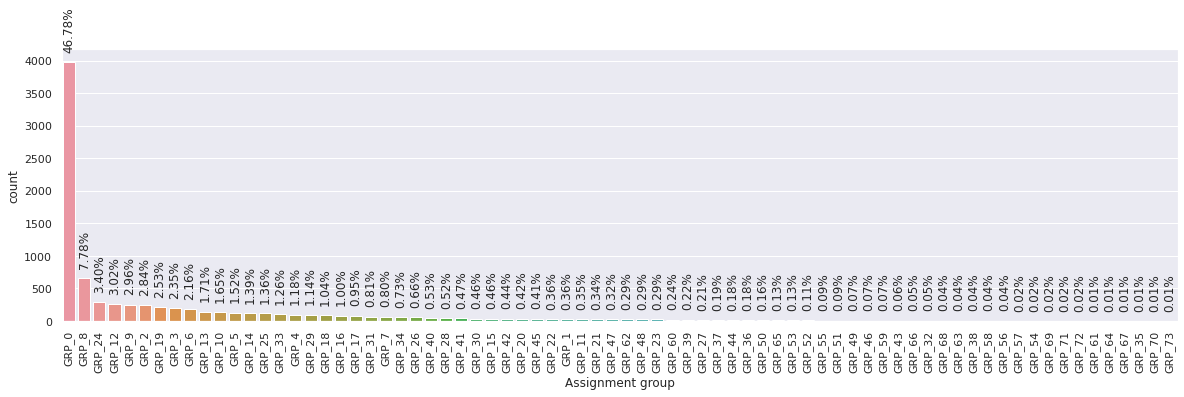

In [449]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')
#augmentation

Checking the most repeated top 20 groups

In [450]:
df_top_20 = df['Assignment group'].value_counts().nlargest(20).reset_index()

In [451]:
top_20 = df_top_20['index'].tolist()
top_20

['GRP_0',
 'GRP_8',
 'GRP_24',
 'GRP_12',
 'GRP_9',
 'GRP_2',
 'GRP_19',
 'GRP_3',
 'GRP_6',
 'GRP_13',
 'GRP_10',
 'GRP_5',
 'GRP_14',
 'GRP_25',
 'GRP_33',
 'GRP_4',
 'GRP_29',
 'GRP_18',
 'GRP_16',
 'GRP_17']

Checking the last 54 assignment groups

In [452]:
df_bottom_40 = df['Assignment group'].value_counts().nsmallest(40).reset_index()
bottom_40 = df_bottom_40['index'].tolist()
bottom_40

['GRP_61',
 'GRP_64',
 'GRP_67',
 'GRP_35',
 'GRP_70',
 'GRP_73',
 'GRP_57',
 'GRP_54',
 'GRP_69',
 'GRP_71',
 'GRP_72',
 'GRP_68',
 'GRP_63',
 'GRP_38',
 'GRP_58',
 'GRP_56',
 'GRP_66',
 'GRP_32',
 'GRP_43',
 'GRP_49',
 'GRP_46',
 'GRP_59',
 'GRP_55',
 'GRP_51',
 'GRP_52',
 'GRP_65',
 'GRP_53',
 'GRP_50',
 'GRP_44',
 'GRP_36',
 'GRP_37',
 'GRP_27',
 'GRP_39',
 'GRP_60',
 'GRP_62',
 'GRP_48',
 'GRP_23',
 'GRP_47',
 'GRP_21',
 'GRP_11']

In [453]:
df['Assignment group'].sample(30)

4796     GRP_0
6584     GRP_0
384     GRP_25
606      GRP_8
7274     GRP_0
7798     GRP_0
7088     GRP_0
4255     GRP_0
8354    GRP_10
3433    GRP_10
260      GRP_0
6884    GRP_12
257     GRP_18
6026     GRP_0
1769    GRP_24
8219    GRP_21
2023     GRP_0
1753     GRP_0
8072    GRP_24
8400    GRP_12
252      GRP_0
6620     GRP_8
6779     GRP_8
3689    GRP_19
6799    GRP_25
704      GRP_0
3496     GRP_0
7853     GRP_0
366      GRP_9
4618     GRP_0
Name: Assignment group, dtype: object

In [454]:
#df_caller_removed = df_bk['English_Description'].str.replace('|'.join(all_callers), '')
df_AG_new = df['Assignment group'].apply(lambda x: 'OTHERS' if str(x) in bottom_40 else x)
df['Assignment group'][4616]

'GRP_12'

In [455]:
df_AG_new.sample(30)

5115     GRP_8
1541     GRP_3
876      GRP_0
4793     GRP_6
3999     GRP_0
3233     GRP_3
3711    GRP_25
2441    OTHERS
4952     GRP_0
3077     GRP_0
6011     GRP_0
5284     GRP_0
1063     GRP_8
527      GRP_0
6631    GRP_42
7700     GRP_3
8225     GRP_0
849      GRP_0
25       GRP_0
2264     GRP_0
3573    GRP_24
2102     GRP_0
4052     GRP_8
2787     GRP_0
6421     GRP_0
1834    GRP_17
325      GRP_0
8214     GRP_0
2135     GRP_0
7345     GRP_2
Name: Assignment group, dtype: object

In [456]:
df['Assignment group'] = df_AG_new
df['Assignment group'].sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6869     GRP_4
743      GRP_0
3734    GRP_10
46       GRP_0
8470    GRP_16
1233    GRP_16
3097    OTHERS
4594    GRP_29
3645     GRP_0
4847     GRP_0
Name: Assignment group, dtype: object

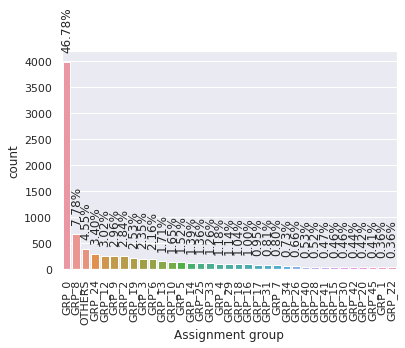

In [457]:
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

Checking the distirbution

In [458]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_50_ticket = {'Description':' 1-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([_1_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins


,Description,Ticket Count
0,1-50 ticket,44
1,51-100 ticket,9
2,>100 ticket,15


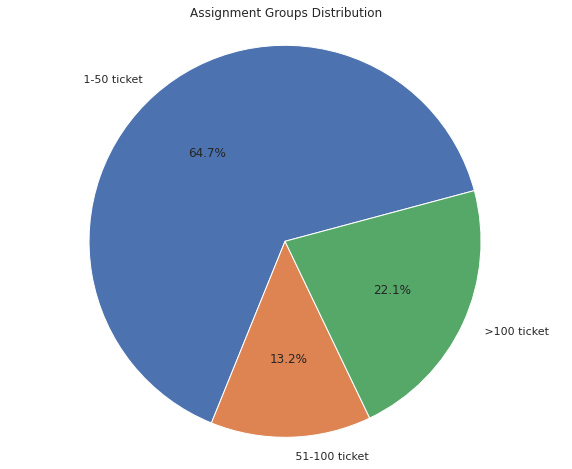

In [459]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [460]:
#checking the null values
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
Languge              0
dtype: int64

In [461]:
#Checking the value of null
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group,Languge


In [462]:
#Replacing the null value with the short description value
df=df.replace({'Description':np.NaN},df[df['Short description']=='i am locked out of skype']['Short description'].to_string().split(maxsplit=1)[1])

In [463]:
#Checking if the value is actually replaced or not
df.iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Caller                      viyglzfo ajtfzpkb
Assignment group                        GRP_0
Languge                            Loading...
Name: 4395, dtype: object

In [464]:
#Checking for the null values
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
Languge              0
dtype: int64

Since we are mostly concerend with the description letting the short description null values be for  a moment

In [465]:
feature_df = df.filter(['Description','Assignment group'], axis=1)

In [466]:
#caluclating the word count
feature_df['word_count']=df['Description'].apply(lambda x:len(str(x).split()))
#printing 5 sample values
feature_df.sample(15)

,Description,Assignment group,word_count
4601,extract the file for the request 2626619 using...,GRP_9,10
6017,"hallo ruchitgrr, hallo frau haug,\n\nleider en...",GRP_9,255
1558,the,GRP_17,1
1604,\n\nreceived from: combxind.bvptuqxr@gmail.com...,GRP_0,31
3235,no audio in dell 7350 2 in 1 tablet,GRP_0,9
2546,received from: monitoring_tool@company.com\n\n...,GRP_8,11
7422,\n\nreceived from: zjcsqtdn.jikyworg@gmail.com...,OTHERS,9
2446,\n\nreceived from: vfoyenlw.ntpbdeyf@gmail.com...,GRP_0,22
621,uacyltoe hxgaycze,OTHERS,2
1350,received from: monitoring_tool@company.com\n\n...,GRP_9,11


In [467]:
# Displaying the row with Maximum word counts
feature_df[feature_df['word_count']==feature_df['word_count'].max()]


,Description,Assignment group,word_count
7345,we are seeing activity indicating the host at ...,GRP_2,1625


In [468]:
# Dispalying rows with minimum word count
feature_df[feature_df['word_count']==feature_df['word_count'].min()]

,Description,Assignment group,word_count
6371,\n\n,GRP_0,0
7397,\n,GRP_0,0


In [469]:
#Method to caluclate no of characters available in sentence
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)


In [470]:
feature_df['char_counts']=df['Description'].apply(lambda x: char_counts(str(x)))
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts
6203,support fÃ¼r umbau \ ewew8323862 \xwirzvda okh...,GRP_24,7,45
7253,alte it equipment abholen \wxstfouy isjzcotm,GRP_24,6,39
377,\n\nreceived from: wdpzfqgi.zndgqcux@gmail.com...,GRP_0,73,409
2255,i'm unable to access any of the bobj explorer ...,GRP_14,22,94
7433,"\nhello chandruhdty, ebi,\n\niÂ´ve created an ...",GRP_18,283,1481


In [471]:
#Checking the minimum character count
feature_df['char_counts'].min()

0

In [472]:
#Checking the maximum character count
feature_df['char_counts'].max()

11105

In [473]:
#Caluclating the average word count
feature_df['Avg_word_Count']=feature_df['word_count']/feature_df['char_counts']
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count
4459,\n\nreceived from: anuxbyzg.bvsqcjkw@gmail.com...,GRP_16,22,185,0.118919
5908,received from: monitoring_tool@company.com\n\n...,OTHERS,11,92,0.119565
6708,the tam sproc is incorrectly inner joining pre...,GRP_25,40,184,0.217391
6921,password reset,GRP_0,2,13,0.153846
8280,received from: monitoring_tool@company.com\n\n...,GRP_9,11,92,0.119565


In [474]:
#Checking the minimum avg word count
print("Minimum avg word count",feature_df['Avg_word_Count'].min())
print("Maximum avg word count",feature_df['Avg_word_Count'].max())

Minimum avg word count 0.008403361344537815
Maximum avg word count 1.0


In [475]:
import json
import re
import string
import nltk
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from string import punctuation
#from wordcloud import WordCloud
#from wordcloud import WordCloud, STOPWORDS

In [476]:
print(stop_words)
len(stop_words)

{'made', 'over', 'whom', 'almost', 'often', 'front', 'but', 'seeming', 'his', '’d', 'so', 'in', 'rather', 'somehow', 'move', 'never', 'whereas', 'ca', 'their', 'should', 'enough', 'put', 'take', 'using', 'per', 'together', 'herein', 'she', 'this', 'i', 'once', 'formerly', 'such', 'quite', 'twelve', 'serious', 'either', 'most', 'into', 'due', 'ten', 'was', 'not', 'them', 'why', 'various', '’ve', 'already', 'three', 'seemed', 'elsewhere', 'some', 'became', 'except', 'five', 'himself', 'amount', 'via', 'doing', 'ever', 'how', 'cannot', 'everyone', "n't", 'now', 'anyhow', 'neither', 'hence', 'before', 'everywhere', 'towards', 'fifty', 'first', 'someone', 'back', 'wherein', 'have', '‘m', 'the', 'until', 'although', 'one', 'n’t', 'along', 'could', 'we', "'m", 'across', 'thence', 'again', 'whether', 'upon', '’re', 'wherever', 'keep', 'and', 'below', 'every', 'beside', 'during', 'though', 'through', '‘ve', 'what', 'is', 'your', 'it', 'whose', "'re", 'somewhere', 'than', 'an', 'give', 'least', 

326

In [477]:
#caluclating the number of stop words in description column
feature_df['stop_words_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t in stop_words]))
#printing the sample values
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count
2360,erp SID_34 password reset,GRP_0,4,22,0.181818,0
4566,ticket update on inplant_859389,GRP_0,4,28,0.142857,1
1095,"' i m not able to ""add a lean event"" through ""...",GRP_0,16,63,0.253968,7
3748,gigaset m2 mit der durchwahl 479\nakku hÃ¤lt n...,GRP_33,22,100,0.220000,1
6534,æ¶‚å±‚ã€_x0081_ç®¡ä¸_x009d_è½¦é—´ç”µè¯_x009d_æ...,OTHERS,1,79,0.012658,0


In [478]:
#caluclating the minimum number of stop words count
print("Minimum number of stop words present",feature_df['stop_words_count'].min())
#caluclating the maximum number of stop words count
print("Maximum number of stop words present", feature_df['stop_words_count'].max())

Minimum number of stop words present 0
Maximum number of stop words present 354


In [479]:
#caluclating the number of digits count in description column
feature_df['Digits_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
#Printing the sample rows
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count
2114,\n\nreceived from: umdyvbxo.qwzstijr@gmail.com...,GRP_12,15,91,0.164835,4,0
6842,unable to open permission protected mails,GRP_19,6,36,0.166667,1,0
802,received from: monitoring_tool@company.com\n\n...,GRP_5,11,97,0.113402,1,0
4506,inqury-does email work on phone without inter...,GRP_0,8,52,0.153846,2,0
5098,owa configured.\nexplained that outlook is als...,GRP_0,9,57,0.157895,4,0


In [480]:
s = feature_df['Digits_count'].groupby(feature_df['Assignment group']).value_counts()

In [481]:
#Checking the maximum count
print("Maximum number of digits present",feature_df['Digits_count'].max())
#Checking the minimum count
print("Minimum number of digits present",feature_df['Digits_count'].min())


Maximum number of digits present 457
Minimum number of digits present 0


In [482]:
#caluclating the number of uppercase count in description column
feature_df['Upper_Case_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isupper()]))
#printing the sample
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count,Upper_Case_count
411,cannot open excel files from \\HostName_1351\d...,GRP_12,20,136,0.147059,7,0,0
8193,please call bqdlegnp lnphmsco at to update his...,GRP_0,14,72,0.194444,8,0,0
3861,\n\nreceived from: rgtarthi.erjgypa@company.co...,GRP_4,23,134,0.171642,10,0,0
3659,erp SID_34 account locked,GRP_0,4,22,0.181818,0,0,1
4113,received from: monitoring_tool@company.com\n\n...,GRP_9,11,93,0.118280,1,0,0


In [483]:
#Checking the maximum count
print("Maximum number of Upper case letters present",feature_df['Upper_Case_count'].max())
#Checking the minimum count
print("Minimum number of Upper case letters present",feature_df['Upper_Case_count'].min())

Maximum number of Upper case letters present 10
Minimum number of Upper case letters present 0


# Cleaning and PreProcessing

In [484]:
df

,Short description,Description,Caller,Assignment group,Languge
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,Loading...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,Loading...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,Loading...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,Loading...
...,...,...,...,...,...
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29,Loading...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,OTHERS,Loading...




1.   The objective of the problem is to categorise the issues based on description and assign them to various groups. Since the short description is extracted from the description only, we can remove the column.
2.  The objective is also to analyse the description and assign tickets


Combine 'Description' and 'Short Description' into a single column

In [485]:
df['combined'] = df['Short description'] + ' ' + df['Description']
df['combined']

0       login issue -verified user details.(employee# ...
1       outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2       cant log in to vpn \n\nreceived from: eylqgodm...
3       unable to access hr_tool page unable to access...
4                               skype error  skype error 
                              ...                        
8495    emails not coming in from zz mail \n\nreceived...
8496    telephony_software issue telephony_software issue
8497    vip2: windows password reset for tifpdchb pedx...
8498    machine nÃ£o estÃ¡ funcionando i am unable to ...
8499    an mehreren pc`s lassen sich verschiedene prgr...
Name: combined, Length: 8500, dtype: object

In [486]:
def fn_lan_detect(df):                                        
   try:                                                          
     0 
     return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['language'] = df['combined'].apply(fn_lan_detect)

In [487]:
df['language'].value_counts()

en    7069
de     382
af     270
it     129
fr     125
sv      77
no      76
nl      71
ca      67
da      61
es      49
pl      30
pt      21
sq      11
tl       9
ro       9
cy       8
hr       8
sl       6
et       5
fi       4
id       4
so       3
cs       2
lt       2
tr       1
sk       1
Name: language, dtype: int64

In [488]:
!pip install googletrans
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [489]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['combined'], x['language']), axis=1)

In [490]:
df.head(5)

,Short description,Description,Caller,Assignment group,Languge,combined,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,Loading...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,en,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn \n\nreceived from: eylqgodm...,en,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,no,skype error skype error


In [491]:
df.to_csv('translated_ticketfintest.csv', index=False, encoding='utf_8_sig')

Droping down the column Description and language after translating

In [492]:
df_translated_text=df.drop(['Description','language'],axis=1)
df_translated_text

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,Loading...,emails not coming in from zz mail \n\nreceived...,emails not coming in from zz mail \n\nreceived...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [493]:
df_translated_text.English_Description=df_translated_text.English_Description.astype(str)
df_translated_text.English_Description

0       login issue -verified user details.(employee# ...
1       outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2       cant log in to vpn \n\nreceived from: eylqgodm...
3       unable to access hr_tool page unable to access...
4                               skype error  skype error 
                              ...                        
8495    emails not coming in from zz mail \n\nreceived...
8496    telephony_software issue telephony_software issue
8497    vip2: windows password reset for tifpdchb pedx...
8498    machine nÃ£o estÃ¡ funcionando i am unable to ...
8499    an mehreren pc`s lassen sich verschiedene prgr...
Name: English_Description, Length: 8500, dtype: object

# regex pattern 

In [494]:
email_pattern = r'\S*@\S*\s?'
url_pattern = r'http\S+'
IPaddress_pattern = r'[0-9]+(?:\.[0-9]+){3}'
tab_nl_pattern = r'\s+'
alpha_pattern = r'[a-zA-Z0-9]*_[a-zA-Z0-9]*'
filepath_pattern = r'/[a-zA-Z0-9/]*'
domain_pattern = r'[a-zA-Z0-9]*.[a-zA-Z0-9.]*'
wordsnum_pattern = r'\w*\d\w*'
nonalpha_pattern = r'[^\w ]+'
numbers_pattern = r'[0-9]*'
underscore_pattern = r'[_]*'

In [495]:
df_bk = df_translated_text
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,Loading...,emails not coming in from zz mail \n\nreceived...,emails not coming in from zz mail \n\nreceived...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [496]:
df_bk = df_bk[(df_bk['English_Description'].str.contains('job_scheduler') == False)]
df_bk = df_bk[(df_bk['English_Description'].str.contains('event:') == False)]

In [497]:
df_bk = df_bk.replace(to_replace = email_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"outlook \n\nreceived from: \nhello team,\n\nm...","outlook \n\nreceived from: \nhello team,\n\nm..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn \n\nreceived from: \nhi\n\...,cant log in to vpn \n\nreceived from: \nhi\n\...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,Loading...,emails not coming in from zz mail \n\nreceived...,emails not coming in from zz mail \n\nreceived...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [498]:
df_bk = df_bk.replace(to_replace = '::', value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"outlook \n\nreceived from: \nhello team,\n\nm...","outlook \n\nreceived from: \nhello team,\n\nm..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn \n\nreceived from: \nhi\n\...,cant log in to vpn \n\nreceived from: \nhi\n\...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,Loading...,emails not coming in from zz mail \n\nreceived...,emails not coming in from zz mail \n\nreceived...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [499]:
df_bk = df_bk.replace("'"," ")
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"outlook \n\nreceived from: \nhello team,\n\nm...","outlook \n\nreceived from: \nhello team,\n\nm..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn \n\nreceived from: \nhi\n\...,cant log in to vpn \n\nreceived from: \nhi\n\...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,Loading...,emails not coming in from zz mail \n\nreceived...,emails not coming in from zz mail \n\nreceived...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [500]:
df_bk = df_bk.replace(to_replace = url_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"outlook \n\nreceived from: \nhello team,\n\nm...","outlook \n\nreceived from: \nhello team,\n\nm..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn \n\nreceived from: \nhi\n\...,cant log in to vpn \n\nreceived from: \nhi\n\...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,Loading...,emails not coming in from zz mail \n\nreceived...,emails not coming in from zz mail \n\nreceived...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [501]:
df_bk = df_bk.replace(to_replace = tab_nl_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"outlook received from: hello team, my meetings...","outlook received from: hello team, my meetings..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn received from: hi i cannot ...,cant log in to vpn received from: hi i cannot ...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,Loading...,emails not coming in from zz mail received fro...,emails not coming in from zz mail received fro...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [502]:
df_bk = df_bk.replace(to_replace = IPaddress_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"outlook received from: hello team, my meetings...","outlook received from: hello team, my meetings..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,cant log in to vpn received from: hi i cannot ...,cant log in to vpn received from: hi i cannot ...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,Loading...,emails not coming in from zz mail received fro...,emails not coming in from zz mail received fro...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [503]:
df_bk = df_bk.replace(to_replace = '_', value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"outlook received from: hello team, my meetings...","outlook received from: hello team, my meetings..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,cant log in to vpn received from: hi i cannot ...,cant log in to vpn received from: hi i cannot ...
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page unable to access...,unable to access hr tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP 29,Loading...,emails not coming in from zz mail received fro...,emails not coming in from zz mail received fro...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue telephony software issue,telephony software issue telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [504]:
df_bk['English_Description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"outlook received from: hello team, my meetings...","outlook received from: hello team, my meetings..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,cant log in to vpn received from: hi i cannot ...,cant log in to vpn received from: hi i cannot ...
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page unable to access...,unable to access hr tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP 29,Loading...,emails not coming in from zz mail received fro...,emails not coming in from zz mail received fro...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue telephony software issue,telephony software issue telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [505]:
df_bk = df_bk.replace(to_replace = filepath_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"outlook received from: hello team, my meetings...","outlook received from: hello team, my meetings..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,cant log in to vpn received from: hi i cannot ...,cant log in to vpn received from: hi i cannot ...
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page unable to access...,unable to access hr tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP 29,Loading...,emails not coming in from zz mail received fro...,emails not coming in from zz mail received fro...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue telephony software issue,telephony software issue telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [506]:
df_bk = df_bk.replace(to_replace = 'received from:', value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"outlook hello team, my meetings meetings et...","outlook hello team, my meetings meetings et..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,cant log in to vpn hi i cannot log on to vpn...,cant log in to vpn hi i cannot log on to vpn...
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page unable to access...,unable to access hr tool page unable to access...
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP 29,Loading...,emails not coming in from zz mail good after...,emails not coming in from zz mail good after...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue telephony software issue,telephony software issue telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...


In [507]:
#Removing unwanted charcters
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x: re.sub(nonalpha_pattern, " ", x))
#Printing sample values
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,combined,English_Description
3944,crm add-in outlook,mdbegvct dbvichlg,GRP 0,Loading...,crm add-in outlook hi it â€“ i'm not seein...,crm add in outlook hi it â i m not seeing...
4006,unable to loginto skype,hlcujyed hqfolasz,GRP 0,Loading...,unable to loginto skype unable to loginto skype,unable to loginto skype unable to loginto skype
2788,reset passwords for hzmxwdrs tcbjyqps using pa...,hzmxwdrs tcbjyqps,GRP 17,Loading...,reset passwords for hzmxwdrs tcbjyqps using pa...,reset passwords for hzmxwdrs tcbjyqps using pa...
4896,printer problem issue information,gasbfqvp fmvqgjih,GRP 33,Loading...,printer problem issue information bei mp60 f...,printer problem issue information bei mp60 f...
1879,erp crm - instant timeout,yjqvpkgn qbshvpje,GRP 15,Loading...,erp crm - instant timeout user: kubyhtuaa issu...,erp crm instant timeout user kubyhtuaa issu...
879,barcode Ã¼ber word etikettendruck,cwrikael oanmsecr,GRP 42,Loading...,barcode Ã¼ber word etikettendruck ich will im ...,barcode Ã¼ber word etikettendruck ich will im ...
1731,i get a mysterious java error on every boot of...,qxhdcnmj caflvjrn,GRP 3,Loading...,i get a mysterious java error on every boot of...,i get a mysterious java error on every boot of...
7199,unable to access ms dynamics crm companyprod e...,rnueobcz lwhcbati,GRP 22,Loading...,unable to access ms dynamics crm companyprod e...,unable to access ms dynamics crm companyprod e...
679,the terminate action for kmzucxgq vjzfocgt has...,ljpgedia bzqcwsgf,GRP 2,Loading...,the terminate action for kmzucxgq vjzfocgt has...,the terminate action for kmzucxgq vjzfocgt has...
973,unable to open outlook,stvpxkbf gqchobaj,GRP 0,Loading...,unable to open outlook unable to open outlook,unable to open outlook unable to open outlook


In [508]:
#Removing numbers
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x: re.sub(numbers_pattern, "", x))
#Printing sample values
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,combined,English_Description
2683,ticket update,pbhmwqtz wqlbudjx,GRP 0,Loading...,ticket update ticket update,ticket update ticket update
4346,falsche formatierung in pdf \bfqnvezs vwkasnxe,bfqnvezs vwkasnxe,GRP 24,Loading...,falsche formatierung in pdf \bfqnvezs vwkasnxe...,falsche formatierung in pdf bfqnvezs vwkasnxe...
5924,vsp computer asset returns,owhuxbnf sxbgyrou,GRP 3,Loading...,"vsp computer asset returns good afternoon, f...",vsp computer asset returns good afternoon f...
8092,reset passwords for prgthyuulla ramdntythanjes...,boirqctx bkijgqry,GRP 17,Loading...,reset passwords for prgthyuulla ramdntythanjes...,reset passwords for prgthyuulla ramdntythanjes...
3663,drucker wk20 defekt,xgejlvkn msbunvpx,GRP 33,Loading...,drucker wk20 defekt drucker wk20 defekt,drucker wk defekt drucker wk defekt
4878,install kis \ewew8323506 \guvgytniak,zlqfptjx xnklbfua,GRP 24,Loading...,install kis \ewew8323506 \guvgytniak install k...,install kis ewew guvgytniak install kis ewe...
7909,account locked.,cwrikael oanmsecr,GRP 0,Loading...,account locked. account locked.,account locked account locked
5516,unable to log in to hub portal,tfbvqliw xrqimykt,GRP 0,Loading...,unable to log in to hub portal unable to log ...,unable to log in to hub portal unable to log ...
8425,ich kann mein erp passwort nicht zurÃ¼ck setzten.,wfbkucds qaxhbois,GRP 0,Loading...,ich kann mein erp passwort nicht zurÃ¼ck setzt...,ich kann mein erp passwort nicht zurÃ¼ck setzt...
2300,windows password reset,dpajkrhy hwvjympt,GRP 0,Loading...,windows password reset windows password reset,windows password reset windows password reset


In [509]:
def Expansions(x):
  expanded_text=[]
  expanded_words=[]
  for x in x.split():
    expanded_words.append(contractions.fix(x))
    expanded_text = ' '.join(expanded_words)
  return(expanded_text)


In [510]:
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x:Expansions(str(x)))
#Printing the sample values
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,combined,English_Description
8098,"network outage, russia ru, company-russia-vpn-...",uxgrdjfc kqxdjeov,GRP 8,Loading...,"network outage, russia ru, company-russia-vpn-...",network outage russia ru company russia vpn rt...
3050,vpn disconnecting,hjxtczwo wdrxmtqg,GRP 0,Loading...,vpn disconnecting vpn disconnecting,vpn disconnecting vpn disconnecting
3995,printer problem (reroute) issue information,qasdhyzm yuglsrwx,GRP 8,Loading...,printer problem (reroute) issue information ...,printer problem reroute issue information hi t...
4164,urgent request to complete your requirement fy...,crkdjbot qiztrxne,GRP 0,Loading...,urgent request to complete your requirement fy...,urgent request to complete your requirement fy...
3627,email search option issue,xyculgav cuqptoah,GRP 19,Loading...,"email search option issue hello, i am not ab...",email search option issue hello i am not able ...
2858,po5616680457 same tax issue,dizquolf hlykecxa,GRP 10,Loading...,po5616680457 same tax issue po5616680457 same ...,po same tax issue po same tax issue
5866,telephony software 2016 r2 - please can you re...,hupnceij hyozjakb,GRP 7,Loading...,telephony software 2016 r2 - please can you re...,telephony software r please can you reset rele...
2056,audio issue in skype,ytqambip bovfzich,GRP 0,Loading...,audio issue in skype audio issue in skype,audio issue in skype audio issue in skype
1700,è´¦æˆ·è¢«é” x0081 å®š,neovalui kabpfvic,OTHERS,Loading...,è´¦æˆ·è¢«é” x0081 å®š ç”¨æˆ·å¿˜è®°å¯†ç x0081 ...,è æˆ è é x å š ç æˆ å è å ç x ï¼Œå ¼è è æˆ é x...
7726,erp routing logic missing for the infrastrctur...,vbmzgsdk jdmyazti,OTHERS,Loading...,erp routing logic missing for the infrastrctur...,erp routing logic missing for the infrastrctur...


In [511]:
!pip install gensim
from gensim.parsing.preprocessing import remove_stopwords
df_bk['English_Description']=df_bk['English_Description'].apply(lambda t: remove_stopwords(''.join(t)))
#Checking for sample rows
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,combined,English_Description
3973,outlook does not start.,sghamujc shompueb,GRP 0,Loading...,outlook does not start. outlook does not start.,outlook start outlook start
4922,user name for fabxjimdghtyo depfugcy,lkwspqce knxaipyj,GRP 0,Loading...,user name for fabxjimdghtyo depfugcy user name...,user fabxjimdghtyo depfugcy user fabxjimdghtyo...
2694,need tc48 printer set up,ferxqvsm esmwxqlf,GRP 0,Loading...,need tc48 printer set up i am trying to connec...,need tc printer set trying connect network pri...
4967,account locked out,ikgrtwhz tmqdiwge,GRP 0,Loading...,account locked out account locked out,account locked account locked
4045,vvdgtyachac,badnzyue nxuqmdwl,GRP 0,Loading...,"vvdgtyachac hi, below mentioned apprentice i...",vvdgtyachac hi mentioned apprentice unable log...
6124,please reset telephony software password for: ...,wqfzjycu omleknjd,GRP 0,Loading...,please reset telephony software password for: ...,reset telephony software password username tic...
3057,unable to connect to company secure in usa,horzelqj ujyzldmh,GRP 0,Loading...,unable to connect to company secure in usa una...,unable connect company secure usa unable conne...
1049,reset passwords for soldfnbq uhnbsvqd using pa...,soldfnbq uhnbsvqd,GRP 17,Loading...,reset passwords for soldfnbq uhnbsvqd using pa...,reset passwords soldfnbq uhnbsvqd password man...
3573,probleme mit skype \difozlav dgbfptos \niptbwd...,niptbwdq csenjruz,GRP 24,Loading...,probleme mit skype \difozlav dgbfptos \niptbwd...,probleme mit skype difozlav dgbfptos niptbwdq ...
4391,change the old pc,jloygrwh acvztedi,GRP 19,Loading...,change the old pc configure the new laptop and...,change old pc configure new laptop remove old pc


In [512]:
#Removing Multiple spaces
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x: re.sub(' +', ' ', ''.join(x)))
#Printing sample values
df_bk['English_Description'].sample(10)

7662    orders plant cpp warehouse release need fixed ...
6396    delay email sending dear explain delay email s...
6242                 sql error SID erp dumps st sql error
247     outlook crashing ic welcome available agent sh...
5694    mobile device activation mobile device activation
3075                        account locked account locked
6369    t copy pdf drawing business client application...
1477    impact awards email nwqktzlx vnlqkgpb sent thu...
7505    unable open outlook ess bad password unable op...
1914    skype lÃ d auf dem pc nicht skype wird nicht v...
Name: English_Description, dtype: object

In [513]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [514]:
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x:remove_accented_chars(x))
#Printing sample values
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,combined,English_Description
4118,password reset alert from o365,ocgkpayl tzadqijk,GRP 0,Loading...,password reset alert from o365 password reset ...,password reset alert o password reset alert o
5902,please help me to set up skype conference call...,dqwhpjxy pozjxbey,GRP 0,Loading...,please help me to set up skype conference call...,help set skype conference calling feature comp...
1934,dell:7350: laptop will not stay connected to t...,kizybvpj hisaobfx,GRP 0,Loading...,dell:7350: laptop will not stay connected to t...,dell laptop stay connected internet stgyott gd...
3433,info type '0017' missing to personal number 56...,fbgetczn jlsvxura,GRP 10,Loading...,info type '0017' missing to personal number 56...,info type missing personal number fbgetczn jls...
5062,"also, the account needs to be given to davgtg...",fabijhsd ocsnugeh,GRP 2,Loading...,"also, the account needs to be given to davgtg...",account needs given davgtgyrh smgnhyleck bhght...
4620,invalid incompletion error on so#24903890,gtfdvnry nxsaqrfh,GRP 13,Loading...,invalid incompletion error on so#24903890 so#3...,invalid incompletion error configuration incom...
445,rma 7112619085 workflow in error status,lwgytuxq qspdztiw,GRP 13,Loading...,rma 7112619085 workflow in error status rma 71...,rma workflow error status rma workflow error s...
2480,crm in outlook not working grethyg,rbozivdq gmlhrtvp,GRP 0,Loading...,crm in outlook not working grethyg crm in ou...,crm outlook working grethyg crm outlook workin...
5459,configure shared mailbox,fmjeaoih ndyezlkb,GRP 0,Loading...,configure shared mailbox need to add two mailb...,configure shared mailbox need add mailboxes ou...
4371,outlook error,qjiutmel fgvtxeoy,GRP 0,Loading...,outlook error neither crm or outlook will l...,outlook error crm outlook load restarted pc ti...


In [515]:
df_bk['English_Description'] = df_bk['English_Description'].str.lower()
df_bk

,Short description,Caller,Assignment group,Languge,combined,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,login issue -verified user details.(employee# ...,login issue verified user details employee man...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"outlook hello team, my meetings meetings et...",outlook hello team meetings meetings appearing...
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,cant log in to vpn hi i cannot log on to vpn...,log vpn hi log vpn best
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page unable to access...,unable access hr tool page unable access hr to...
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error skype error,skype error skype error
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP 29,Loading...,emails not coming in from zz mail good after...,emails coming zz mail good afternoon receiving...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue telephony software issue,telephony software issue telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip windows password reset tifpdchb pedxruyf v...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine na o esta funcionando unable access ma...


In [516]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi ', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    
    return text

In [517]:
df_bk['English_Description'] = df_bk['English_Description'].apply(lambda x: clean_text(x))

Caller Name Removal

In [518]:
callers = df
callers[['firstname', 'lastname']] = df['Caller'].str.split(" ", expand=True)
callers = callers[['firstname', 'lastname']]
all_callers = callers['firstname'].tolist() + (callers['lastname'].tolist())
print(len(all_callers))
all_callers = list(set(callers['firstname'].tolist() + (callers['lastname'].tolist())))
print(len(all_callers))
print(all_callers)

17000
5900
['pmgzhivt', 'fbpvrqzh', 'dqovxreg', 'ltqhgdbf', 'qolrvbip', 'bivcmwlh', 'kcudbnrw', 'nvawmlch', 'svuboezf', 'rguyoajm', 'eqfsphnd', 'uplmtybe', 'janivrtg', 'ulmctsvi', 'wkqjcfgy', 'iwazgesl', 'sqTVbvkm', 'vroxskje', 'mtgujlcb', 'yawtxuod', 'zvwrklfa', 'hcuixqgj', 'qoiyjcah', 'cxsembup', 'qhcozdfx', 'sjeryqba', 'wvhilrpz', 'vldwtjgr', 'kbicqjrp', 'cobdhkmj', 'ljxdfhus', 'ugyothfz', 'pozjxbey', 'zrvbahym', 'pguesbno', 'encpjsxq', 'gudfnirz', 'makhtjcu', 'mfobkyun', 'tzrekwqf', 'boyqfsca', 'unzfykar', 'zmhorudq', 'mrwucjho', 'grmuhwix', 'uarnkqps', 'gpkovbah', 'tmjxhlwf', 'dkxlpvnr', 'hyozjakb', 'ztqkbuic', 'ugyawsjv', 'krynlisw', 'pzhyxdiq', 'kmubdazp', 'duwvesim', 'dcvphjru', 'dcksxjeq', 'pjlcoqds', 'kqtnfvrl', 'ahmgtlyf', 'pizcefdg', 'nqksogtm', 'zupifghd', 'dbocqmpt', 'gqkedvzu', 'jitrahgx', 'fjlwmson', 'bnoupaki', 'kizsjfpq', 'yibsguwk', 'tyqgpkxz', 'qzioyhud', 'sntvfpbl', 'iymwcelx', 'rchywvmz', 'xzupryaf', 'shqjbzpf', 'bgyluoqn', 'tvmlrwkz', 'dxfbqwyg', 'nizholae', 'dpu

In [519]:
df_caller_removed = df_bk['English_Description'].str.replace('|'.join(all_callers), '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [520]:
df_bk['English_Description'][2839]

'ughzilfm cfibdamq wanted details check company guest ughzilfm cfibdamq wanted details check company guest'

In [521]:
df_caller_removed[2839]

'  wanted details check company guest   wanted details check company guest'

In [522]:
df_bk['English_Description'] = df_caller_removed

In [523]:
df_bk['English_Description']

0       login issue verified user details employee man...
1       outlook  team meetings meetings appearing outl...
2                                        log vpn log vpn 
3       unable access hr tool page unable access hr to...
4                                 skype error skype error
                              ...                        
8495    emails coming zz mail good afternoon receiving...
8496    telephony software issue telephony software issue
8497    vip windows password reset tifpdchb pedxruyf v...
8498    machine na o esta funcionando unable access ma...
8499    mehreren pc s lassen sich verschiedene prgramd...
Name: English_Description, Length: 7528, dtype: object

In [524]:
df_bk['English_Description'][2839]

'  wanted details check company guest   wanted details check company guest'

In [525]:
df_bk['number_of_words'] = df_bk['English_Description'].apply(lambda x: len(x.split()))

In [526]:
df_bk.sample()

,Short description,Caller,Assignment group,Languge,combined,English_Description,number_of_words
43,please reroute jobs on printer01 to printer02 ...,yisohglr uvteflgb,GRP 5,Loading...,please reroute jobs on printer01 to printer02 ...,reroute jobs printer printer issue needs resol...,51


In [527]:
#df_text = df_translated_text.drop(['Short description','Caller','English_Description','Expansions','Description_Removed_StopWords'], axis=1)

df_text = df_bk

In [528]:
#Checking maximum words and mimimum words
print("Maximum no of words",df_text['number_of_words'].max())
print("Minimum no of words",df_text['number_of_words'].min())

Maximum no of words 1023
Minimum no of words 0


In [529]:
df_text=df_text[df_text['number_of_words']>0]


In [530]:
df_text.shape

(7521, 7)

In [531]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts())
group_Counts=group_Counts.rename_axis('Groups').reset_index()

In [532]:
group_Counts

,Groups,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,OTHERS,387
3,GRP_24,289
4,GRP_12,257
5,GRP_9,252
6,GRP_2,241
7,GRP_19,215
8,GRP_3,200
9,GRP_6,184


In [533]:
Groups = df_bk['Assignment group'].unique()
Groups

array(['GRP 0', 'GRP 3', 'GRP 4', 'GRP 5', 'GRP 7', 'GRP 6', 'GRP 8',
       'OTHERS', 'GRP 12', 'GRP 14', 'GRP 15', 'GRP 16', 'GRP 17',
       'GRP 18', 'GRP 19', 'GRP 2', 'GRP 20', 'GRP 22', 'GRP 24',
       'GRP 25', 'GRP 13', 'GRP 26', 'GRP 28', 'GRP 29', 'GRP 9',
       'GRP 30', 'GRP 31', 'GRP 33', 'GRP 10', 'GRP 34', 'GRP 40',
       'GRP 41', 'GRP 1', 'GRP 42', 'GRP 45'], dtype=object)

In [534]:
list_1=list(group_Counts[group_Counts['Assignment group']<=75].Groups)

In [535]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts(normalize=True),)
group_Counts=group_Counts.rename_axis('unique_values').reset_index()
group_Counts=group_Counts.rename(columns = {'unique_values':'Asignment_group','Assignment group':'Perecentage'}, inplace=False)

In [536]:
df_text=df_text.replace(list_1,'Others')

In [537]:
len(df_text['Assignment group'].value_counts().unique())

32

In [538]:
df_text

,Short description,Caller,Assignment group,Languge,combined,English_Description,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,login issue -verified user details.(employee# ...,login issue verified user details employee man...,22
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"outlook hello team, my meetings meetings et...",outlook team meetings meetings appearing outl...,10
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,cant log in to vpn hi i cannot log on to vpn...,log vpn log vpn,4
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page unable to access...,unable access hr tool page unable access hr to...,10
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error skype error,skype error skype error,4
...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP 29,Loading...,emails not coming in from zz mail good after...,emails coming zz mail good afternoon receiving...,12
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue telephony software issue,telephony software issue telephony software issue,6
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip windows password reset tifpdchb pedxruyf v...,12
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine na o esta funcionando unable access ma...,14


In [539]:
df_text['English_Description'].replace(to_replace = wordsnum_pattern, value=' ', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = wordsnum_pattern, value='alpha', regex=True, inplace=True)
df_text['English_Description']

0       login issue verified user details employee man...
1       outlook  team meetings meetings appearing outl...
2                                        log vpn log vpn 
3       unable access hr tool page unable access hr to...
4                                 skype error skype error
                              ...                        
8495    emails coming zz mail good afternoon receiving...
8496    telephony software issue telephony software issue
8497    vip windows password reset tifpdchb pedxruyf v...
8498    machine na o esta funcionando unable access ma...
8499    mehreren pc s lassen sich verschiedene prgramd...
Name: English_Description, Length: 7521, dtype: object

In [540]:
top_n = 5
s = df['Caller'].groupby(df['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

In [541]:
df_bk.to_csv('translated_ticketfins.csv', index=False, encoding='utf_8_sig')

cleaned description senteces to words

In [542]:
combined_text=df_bk.English_Description.values.tolist()

In [543]:
combined_text

['login issue verified user details employee manager checked user ad reset password advised user login check caller confirmed able login issue resolved',
 'outlook  team meetings meetings appearing outlook calendar somebody advise correct ',
 'log vpn log vpn ',
 'unable access hr tool page unable access hr tool page',
 'skype error skype error',
 'unable log engineering tool skype unable log engineering tool skype',
 'ticket employment status new non employee enter user s ticket employment status new non employee enter user s',
 'unable disable add ins outlook unable disable add ins outlook',
 'ticket update inplant ticket update inplant',
 'engineering tool says connected unable submit reports engineering tool says connected unable submit reports',
 'hr tool site loading page correctly hr tool site loading page correctly',
 'unable login hr tool sgxqsuojr xwbesorf cards unable login hr tool sgxqsuojr xwbesorf cards',
 'user wants reset password user wants reset password',
 'unable op

In [544]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [545]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [546]:
dat = pd.DataFrame({'col':data_words})

In [547]:
dat.sample(5)

,col
6205,"[need, uasername, password, ewseditor, uacylto..."
1468,"[new, customer, problme, created, new, custome..."
3564,"[outlook, working, ve, updated, sp, outlook, w..."
6962,"[password, reset, password, sending, password,..."
5894,"[unable, login, engineering, tool, unable, log..."


Bigram Trigam data working

In [548]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [549]:
print(bigram_mod[data_words[1]])

['outlook', 'team', 'meetings', 'meetings', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [550]:
print(trigram_mod[bigram_mod[data_words[1]]])

['outlook', 'team', 'meetings', 'meetings', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [551]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [552]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [553]:
print(data_words_bigrams[1])

['outlook', 'team', 'meetings', 'meetings', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


#Word cloud

In [554]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [555]:
wordclouds=' '.join(map(str, dat['col'])) 
wordclouds

"['login', 'issue', 'verified', 'user', 'details', 'employee', 'manager', 'checked', 'user', 'ad', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller', 'confirmed', 'able', 'login', 'issue', 'resolved'] ['outlook', 'team', 'meetings', 'meetings', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct'] ['log', 'vpn', 'log', 'vpn'] ['unable', 'access', 'hr', 'tool', 'page', 'unable', 'access', 'hr', 'tool', 'page'] ['skype', 'error', 'skype', 'error'] ['unable', 'log', 'engineering', 'tool', 'skype', 'unable', 'log', 'engineering', 'tool', 'skype'] ['ticket', 'employment', 'status', 'new', 'non', 'employee', 'enter', 'user', 'ticket', 'employment', 'status', 'new', 'non', 'employee', 'enter', 'user'] ['unable', 'disable', 'add', 'ins', 'outlook', 'unable', 'disable', 'add', 'ins', 'outlook'] ['ticket', 'update', 'inplant', 'ticket', 'update', 'inplant'] ['engineering', 'tool', 'says', 'connected', 'unable', 'submit', 'reports', 'engineering', 'tool', 'says', '

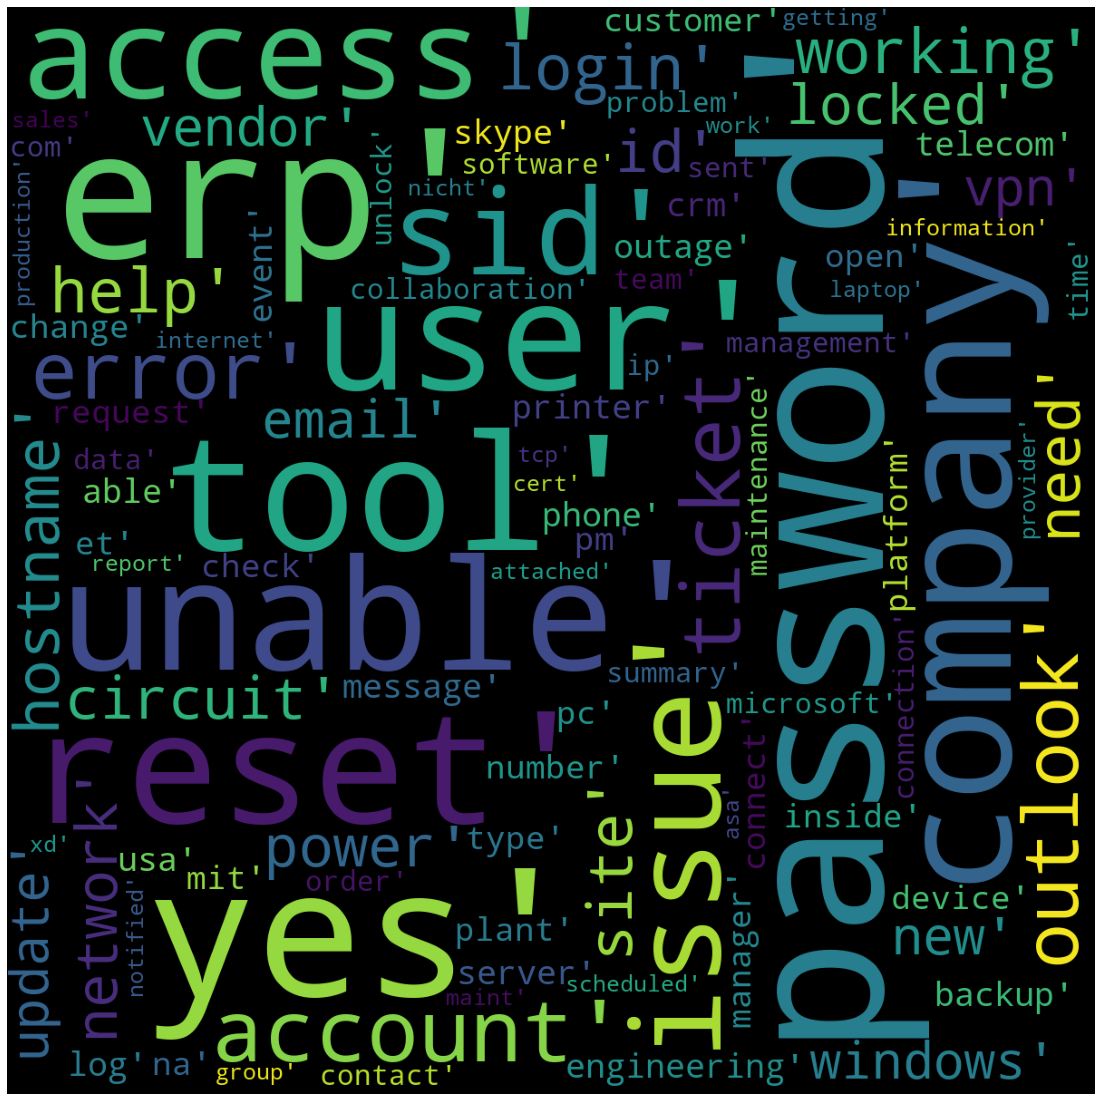

In [556]:
#check for the word count 100)
wrds = WordCloud(width=1200, height=1200, max_words=100, collocations=False).generate(wordclouds)
plt.figure(figsize=(20,20))
plt.imshow(wrds)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [557]:
new_df = df_bk.copy()
new_df['words'] = data_words_bigrams
new_df

,Short description,Caller,Assignment group,Languge,combined,English_Description,number_of_words,words
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,login issue -verified user details.(employee# ...,login issue verified user details employee man...,22,"[login, issue, verified, user, details, employ..."
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"outlook hello team, my meetings meetings et...",outlook team meetings meetings appearing outl...,10,"[outlook, team, meetings, meetings, appearing,..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,cant log in to vpn hi i cannot log on to vpn...,log vpn log vpn,4,"[log, vpn, log, vpn]"
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page unable to access...,unable access hr tool page unable access hr to...,10,"[unable, access, hr, tool, page, unable, acces..."
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error skype error,skype error skype error,4,"[skype, error, skype, error]"
...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP 29,Loading...,emails not coming in from zz mail good after...,emails coming zz mail good afternoon receiving...,12,"[emails, coming, zz, mail, good_afternoon, rec..."
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue telephony software issue,telephony software issue telephony software issue,6,"[telephony_software, issue, telephony_software..."
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip windows password reset tifpdchb pedxruyf v...,12,"[vip, windows, password, reset, tifpdchb, pedx..."
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine na o esta funcionando unable access ma...,14,"[machine, na, esta, funcionando, unable, acces..."


In [558]:
new_df['word_count']=new_df['English_Description'].apply(lambda x:len(str(x).split()))
new_df['char_counts']=new_df['English_Description'].apply(lambda x: char_counts(str(x)))
new_df['Digits_count']=new_df['English_Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
new_df['Avg_word_Count']=new_df['word_count']/new_df['char_counts']

In [559]:
new_df

,Short description,Caller,Assignment group,Languge,combined,English_Description,number_of_words,words,word_count,char_counts,Digits_count,Avg_word_Count
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,login issue -verified user details.(employee# ...,login issue verified user details employee man...,22,"[login, issue, verified, user, details, employ...",22,128,0,0.171875
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"outlook hello team, my meetings meetings et...",outlook team meetings meetings appearing outl...,10,"[outlook, team, meetings, meetings, appearing,...",10,72,0,0.138889
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,cant log in to vpn hi i cannot log on to vpn...,log vpn log vpn,4,"[log, vpn, log, vpn]",4,12,0,0.333333
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page unable to access...,unable access hr tool page unable access hr to...,10,"[unable, access, hr, tool, page, unable, acces...",10,44,0,0.227273
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error skype error,skype error skype error,4,"[skype, error, skype, error]",4,20,0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP 29,Loading...,emails not coming in from zz mail good after...,emails coming zz mail good afternoon receiving...,12,"[emails, coming, zz, mail, good_afternoon, rec...",12,62,0,0.193548
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue telephony software issue,telephony software issue telephony software issue,6,"[telephony_software, issue, telephony_software...",6,44,0,0.136364
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...,vip windows password reset tifpdchb pedxruyf v...,12,"[vip, windows, password, reset, tifpdchb, pedx...",12,78,0,0.153846
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,OTHERS,Loading...,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine na o esta funcionando unable access ma...,14,"[machine, na, esta, funcionando, unable, acces...",14,91,0,0.153846


# Ends Here

In [560]:
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
new_df['token_desc'] = new_df['English_Description'].apply(lambda x: tokenizer.tokenize(x))

In [561]:
new_df['token_desc'].head()

0    [login, issue, verified, user, details, employ...
1    [outlook, team, meetings, meetings, appearing,...
2                                 [log, vpn, log, vpn]
3    [unable, access, hr, tool, page, unable, acces...
4                         [skype, error, skype, error]
Name: token_desc, dtype: object

In [562]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

new_df['token_desc'] = new_df['token_desc'].apply(lambda x : combine_text(x))

In [563]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(new_df['token_desc'])

In [564]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [565]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
erp,2.952974
password,2.981466
tool,3.140930
unable,3.150011
reset,3.169585
issue,3.181281
company,3.278829
user,3.344492
access,3.382606
error,3.444940


In [566]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
outside access,7.847076
dst outside,7.847076
tcp src,7.623932
deny tcp,7.623932
asa deny,7.441611
acl,7.441611
acl inside,7.441611
access group,7.441611
group acl,7.441611
inside dst,7.441611


In [567]:
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head(10)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.165292,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213255,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.712327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.443856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [568]:
df_inc['Assignment_group']= new_df['Assignment group']
df_inc['token_desc']= new_df['token_desc']

In [569]:
df_inc.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,Assignment_group,token_desc
4499,0.049272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.05713,0.000000,0.0,0.0,0.0,0.0,0.0,GRP 8,circuit outage paris company primary mpls circ...
2720,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,GRP 0,german german
2743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,GRP 0,frequent account lock user wothyehre locked day
565,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.337379,0.0,0.0,0.0,0.0,0.0,GRP 0,new iphone activation die synchronisierung mit...
7142,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,GRP 12,lhqsm hrsync sync failed sync detected hours i...
6955,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.322166,0.0,0.0,0.0,0.0,0.0,GRP 0,unable scroll pages unable scroll pages
3160,0.000000,0.542379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,GRP 25,compensation missing september inwarehouse too...
2624,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2278,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,GRP 0,account unlock account unlock
2172,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,GRP 0,vip upgrade vip upgrade


In [570]:
df_inc_sample = df_inc[df_inc['Assignment_group'].map(df_inc['Assignment_group'].value_counts()) > 100]

In [571]:
df_inc_sample = new_df[new_df['Assignment group'].map(new_df['Assignment group'].value_counts()) > 100]

In [572]:
df_inc_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 8499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Short description    6249 non-null   object 
 1   Caller               6249 non-null   object 
 2   Assignment group     6249 non-null   object 
 3   Languge              6249 non-null   object 
 4   combined             6249 non-null   object 
 5   English_Description  6249 non-null   object 
 6   number_of_words      6249 non-null   int64  
 7   words                6249 non-null   object 
 8   word_count           6249 non-null   int64  
 9   char_counts          6249 non-null   int64  
 10  Digits_count         6249 non-null   int64  
 11  Avg_word_Count       6242 non-null   float64
 12  token_desc           6249 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 683.5+ KB


In [573]:
X = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

In [574]:
#X.to_csv('X.csv', index=False, encoding='utf_8_sig')

In [575]:
df_inc_sample.shape

(6249, 13)

In [576]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [577]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25)

In [578]:
import nltk
# nltk.download()

In [579]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1,2), stop_words=stopwords.words('english'), 
                             min_df = 0.05, max_df = 0.8, max_features = 100)

In [580]:
vectorizer

CountVectorizer(max_df=0.8, max_features=100, min_df=0.05, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [581]:
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
X_train_dtm

<4686x25 sparse matrix of type '<class 'numpy.int64'>'
	with 10025 stored elements in Compressed Sparse Row format>

In [582]:
X_test

889             ticket update ticket ticket update ticket
5596    unable print engineering drawing tool unable p...
8410                  chat disconnected chat disconnected
6091    help unlock pw user zhrgtangs tried unlock pas...
2959    hsh reset password mr aqihfoly xsrkthvf emp us...
                              ...                        
6800    unable open order confirmation erp snap shot s...
3699    qlhmawgi sgwipoxn roaghyunokepc locked qlhmawg...
7925                            setup new ws setup new ws
3891        windows account locked windows account locked
6729      windows account lockout windows account lockout
Name: token_desc, Length: 1563, dtype: object

In [583]:
# check the vocabulary( First 15 features)
vectorizer.get_feature_names()[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'access',
 'account',
 'company',
 'erp',
 'erp sid',
 'error',
 'help',
 'issue',
 'locked']

In [584]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
ovr = OneVsRestClassifier(lr)

ovr.fit(X_train_dtm, y_train)
y_pred_ovr_test = ovr.predict(X_test_dtm)
y_pred_ovr_test

array([0, 0, 0, ..., 0, 0, 0])

In [585]:
from sklearn.metrics import accuracy_score
ovr.fit(X_train_dtm, y_train)
pred = ovr.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
linear_acc=accuracy_score(y_test,pred)

0.6596289187460013


In [586]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       987
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        29
           3       0.50      0.07      0.12        28
           4       0.00      0.00      0.00        57
           5       0.57      0.20      0.30        59
           6       0.00      0.00      0.00        80
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        38
          10       0.80      0.62      0.70        63
          11       1.00      0.02      0.04        88

    accuracy                           0.66      1563
   macro avg       0.29      0.16      0.16      1563
weighted avg       0.54      0.66      0.54      1563



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


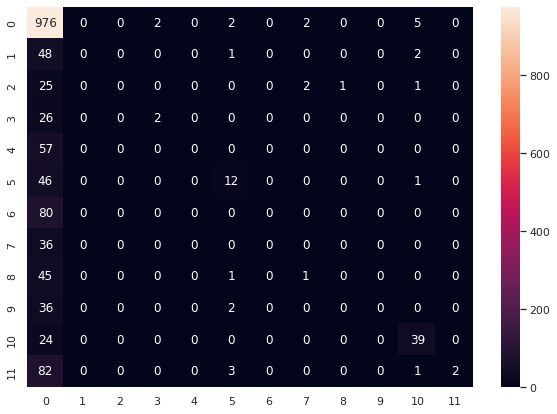

In [587]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [588]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train_dtm, y_train)
pred = lsvc.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
SVC_acc=accuracy_score(y_test,pred)
conf_mat = confusion_matrix(y_test, pred)
print(classification_report(y_test,pred))

0.6570697376839412
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       987
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        57
           5       0.57      0.20      0.30        59
           6       0.00      0.00      0.00        80
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        38
          10       0.76      0.62      0.68        63
          11       0.00      0.00      0.00        88

    accuracy                           0.66      1563
   macro avg       0.17      0.15      0.15      1563
weighted avg       0.47      0.66      0.54      1563



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

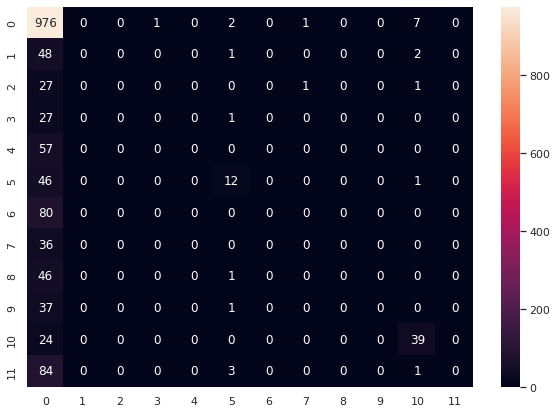

In [589]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [590]:

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=150, random_state=100, bootstrap=False)
rfcl = rfcl.fit(X_train_dtm, y_train)
pred_RF = rfcl.predict(X_test_dtm)
acc_RF = accuracy_score(y_test, pred_RF)
print(acc_RF)

0.6506717850287908


In [591]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_train_dtm, y_train)
pred = clf.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
ber_acc=accuracy_score(y_test,pred)
print(pred)

0.6468330134357005
[0 0 0 ... 0 0 0]


In [592]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78       987
           1       0.40      0.04      0.07        51
           2       0.67      0.07      0.12        29
           3       1.00      0.04      0.07        28
           4       0.33      0.02      0.03        57
           5       0.42      0.22      0.29        59
           6       0.00      0.00      0.00        80
           7       0.27      0.08      0.13        36
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        38
          10       0.65      0.56      0.60        63
          11       0.00      0.00      0.00        88

    accuracy                           0.65      1563
   macro avg       0.37      0.17      0.17      1563
weighted avg       0.52      0.65      0.54      1563



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


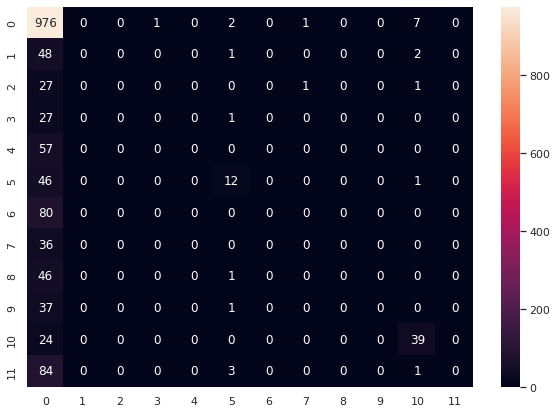

In [593]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [594]:
df_comp = pd.DataFrame({'Classification Algorithm':['Logistic Regression', 'Linear SVC', 'RandomForest', 
                                                    'Bernoullis Classifier'],'Accuracy (%)':
                                              [linear_acc*100,SVC_acc*100,acc_RF*100,ber_acc*100]})

print("Following table shows comparison of the classification algorithms: ")
df_comp

Following table shows comparison of the classification algorithms: 


,Classification Algorithm,Accuracy (%)
0,Logistic Regression,65.962892
1,Linear SVC,65.706974
2,RandomForest,65.067179
3,Bernoullis Classifier,64.683301


In [595]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [596]:
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
  return dataframe


In [597]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

df_text['Assignment group'],grp_mapping_all_raw = labelencoder(df_text['Assignment group'])

In [598]:
df_text.sample(10)

,Short description,Caller,Assignment group,Languge,combined,English_Description,number_of_words
6368,aw: please take this survey related to ticket ...,tgpvrbyi ztdxwpcn,0,Loading...,aw: please take this survey related to ticket ...,aw survey related ticket sehr geehrter hr souz...,14
6566,unlocked erp password,fyjivxud ztasbivg,0,Loading...,unlocked erp password unlocked erp password,unlocked erp password unlocked erp password,6
7051,unlock account email in cell phone the users q...,qasdhyzm yuglsrwx,0,Loading...,unlock account email in cell phone the users q...,unlock account email cell phone users id nas...,25
3842,need access to emails of for a year.,khrflgcj zxojidhe,16,Loading...,need access to emails of for a year. need acce...,need access emails year need access emails yea...,9
2654,unable to access engineering tool,vewdsifl zjdmftkv,0,Loading...,"unable to access engineering tool dear sir, ...",unable access engineering tool dear sir unable...,17
533,password has expired,bqrwfkun tsdzmplq,0,Loading...,password has expired garthyhtuy was out of off...,password expired garthyhtuy office long time n...,12
1546,automatical stock transfers shows wrong (tool ...,yfmaqovp wdonhbez,30,Loading...,automatical stock transfers shows wrong (tool ...,automatical stock transfers shows wrong tool l...,48
2870,login issue,kdjfhwua arfpnhbj,0,Loading...,login issue login issue -verified user details...,login issue login issue verified user details ...,24
1636,cannot print to cl92,irpvzhym kayqlbuh,0,Loading...,cannot print to cl92 ever since a recent works...,print cl recent workstation unable print cl pr...,20
1500,unable to login to collaboration platform with...,aeykqxlr brpdswvu,0,Loading...,unable to login to collaboration platform with...,unable login collaboration platform email addr...,14


In [599]:
df_text['number_of_words'].max()

1023

In [600]:
new_df['char_counts'].max()

4463

# Word2Vec embedding

In [601]:
sentences = [line.split(' ') for line in df_text['English_Description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format('word2vec_vector.txt')

In [602]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 12034 word vectors.


In [603]:
maxlen = 100
numWords = 1000
epochs = 10

In [604]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

# LSTM Model

In [605]:
# class LstmModel:
#   model= Model()
#   X_test=[]
#   y_test=[]
#   embedding_matrix=[]

#   def wordTokenizer(self, dataframe):
#     tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
#     tokenizer.fit_on_texts(dataframe)
#     dataframe = tokenizer.texts_to_sequences(dataframe)
#     return tokenizer,dataframe
  
#   def splitData(self,X,y):

#     print("Number of Samples:", len(X))
#     print("Number of Labels: ", len(y))
#     X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
#     X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
#     print("Number of train Samples:", len(X_train))
#     print("Number of val Samples:", len(X_Val))

#     return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

#   def tokenizeAndEmbedding(self,dataframe):
    
#     tokenizer,X = self.wordTokenizer(dataframe['English_Description'])
#     y = np.asarray(dataframe['Assignment group'])
#     X = pad_sequences(X, maxlen = maxlen)
#     print(y)
#     self.embedding_matrix = np.zeros((numWords+1, 100))
#     for i,word in tokenizer.index_word.items():  
#       if i<numWords+1:
#         embedding_vector = embeddings_index.get(word)
#         if embedding_vector is not None:
#             self.embedding_matrix[i] = embedding_vector
#     return X,y

#   def train(self, dataframe, batch_size, epochs):
   
#     X,y = self.tokenizeAndEmbedding(dataframe)
#     X_train,_, y_train,_, X_Val, y_Val = self.splitData(X,y)
#     model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
#     return model_history

#   def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
#     input_layer = Input(shape=(maxlen,),dtype=tf.int64)
#     embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
#     lstm=Bidirectional(LSTM(128))(embed)
#     drop=Dropout(0.3)(lstm)
#     dense =Dense(100,activation='relu')(drop)
#     out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

#     self.model = Model(input_layer,out)
#     self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

#     self.model.summary()
#     plot_model(self.model,to_file="LSTM_Model.jpg")

#     checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
#     reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
#     model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

#     return model_history,self.model

#   def prediction(self):
      
#      pred = self.model.predict(self.X_test)
#      pred = [i.argmax() for i in pred]
#      accuracy = metrics.accuracy_score(self.y_test, pred)
#      print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
#      return accuracy

#   def plotModelAccuracy(self, history, modelname):
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])

#     plt.title(modelname+' model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train','test'], loc='upper left')
#     plt.show()

#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])

#     plt.title(modelname+' model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train','test'], loc='upper left')
#     plt.show()

In [606]:
# maxlen = 100
# numWords = 1000
# epochs = 10

In [607]:
# Groups = df_bk['Assignment group'].unique()
# Groups

In [608]:
# #Check how the LSTM Model perform with the cleansed data
# lstmModelRawData = LstmModel()
# lstmModelRawData_history, model = lstmModelRawData.train(df_text,100,epochs)
# rawData_accuracy = lstmModelRawData.prediction()

In [609]:
# lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

# BERT

In [610]:
# !pip install bert-for-tf2

In [611]:
# !pip install sentencepiece

In [612]:
# try:
#     %tensorflow_version 2.x
# except Exception:
#     pass
# import tensorflow as tf

# import tensorflow_hub as hub

# from tensorflow.keras import layers
# import bert

In [613]:
# y = df_text['Assignment group']
# y

In [614]:
# contents = df_text['English_Description']

In [615]:
# contents

In [616]:
# def tokenize_content(text_conotent):
#     return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_conotent)) 

In [617]:
# pip install --upgrade nltk

In [618]:
# tokenized_contents = [tokenize_content(content) for content in contents]
# tokenized_contents

In [619]:
# content_with_len = [[content, y.iloc[j], len(content)]
#                  for j, content in enumerate(tokenized_contents)]

In [620]:
# import random
# random.shuffle(content_with_len)

In [621]:
# content_with_len.sort(key=lambda x: x[2])

In [622]:
# sorted_content_labels = [(content_lab[0], content_lab[1]) for content_lab in content_with_len]

In [623]:
# processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_content_labels, output_types=(tf.int32, tf.int32))

In [624]:
# BATCH_SIZE = 32
# batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [625]:
# next(iter(batched_dataset))

In [626]:
# TOTAL_BATCHES = math.ceil(len(sorted_content_labels) / BATCH_SIZE)
# TEST_BATCHES = TOTAL_BATCHES // 10
# batched_dataset.shuffle(TOTAL_BATCHES)
# test_data = batched_dataset.take(TEST_BATCHES)
# train_data = batched_dataset.skip(TEST_BATCHES)

In [627]:
# class TEXT_MODEL(tf.keras.Model):
    
#     def __init__(self,
#                  vocabulary_size,
#                  embedding_dimensions=128,
#                  cnn_filters=50,
#                  dnn_units=512,
#                  model_output_classes=2,
#                  dropout_rate=0.1,
#                  training=False,
#                  learning_rate=1e-5,
#                  name="text_model"):
#         super(TEXT_MODEL, self).__init__(name=name)
        
#         self.embedding = layers.Embedding(vocabulary_size,
#                                           embedding_dimensions)
#         self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
#                                         kernel_size=2,
#                                         padding="valid",
#                                         activation="relu")
#         self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
#                                         kernel_size=3,
#                                         padding="valid",
#                                         activation="relu")
#         self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
#                                         kernel_size=4,
#                                         padding="valid",
#                                         activation="relu")
#         self.pool = layers.GlobalMaxPool1D()
        
#         self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
#         self.dropout = layers.Dropout(rate=dropout_rate)
#         if model_output_classes == 2:
#             self.last_dense = layers.Dense(units=1,
#                                            activation="sigmoid")
#         else:
#             self.last_dense = layers.Dense(units=model_output_classes,
#                                            activation="softmax")
    
#     def call(self, inputs, training):
#         l = self.embedding(inputs)
#         l_1 = self.cnn_layer1(l) 
#         l_1 = self.pool(l_1) 
#         l_2 = self.cnn_layer2(l) 
#         l_2 = self.pool(l_2)
#         l_3 = self.cnn_layer3(l)
#         l_3 = self.pool(l_3) 
        
#         concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
#         concatenated = self.dense_1(concatenated)
#         concatenated = self.dropout(concatenated, training)
#         model_output = self.last_dense(concatenated)
        
#         return model_output

In [628]:
# VOCAB_LENGTH = len(tokenizer.vocab)
# EMB_DIM = 200
# CNN_FILTERS = 100
# DNN_UNITS = 256
# OUTPUT_CLASSES = 2

# DROPOUT_RATE = 0.2

# NB_EPOCHS = 5

In [629]:
# text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
#                         embedding_dimensions=EMB_DIM,
#                         cnn_filters=CNN_FILTERS,
#                         dnn_units=DNN_UNITS,
#                         model_output_classes=OUTPUT_CLASSES,
#                         dropout_rate=DROPOUT_RATE)

In [630]:
# if OUTPUT_CLASSES == 2:
#     text_model.compile(loss="binary_crossentropy",
#                        optimizer="adam",
#                        metrics=["accuracy"])
# else:
#     text_model.compile(loss="sparse_categorical_crossentropy",
#                        optimizer="adam",
#                        metrics=["sparse_categorical_accuracy"])

In [631]:
# text_model.fit(train_data, epochs=NB_EPOCHS)

# BERT 2

In [632]:
!pip install tensorflow_text

In [647]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [648]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_text['English_Description'], df_text['Assignment group'], stratify=df_text['Assignment group'])

In [649]:
X_train

8409    supply chain software password reset supply ch...
7528      unable launch netweaver unable launch netweaver
2326    window locked user id laijuttryhr help desk te...
3061    inwarehouse tools automatically sent helical r...
4199    revised prices local sure facts a confirm cust...
                              ...                        
5182    reset passwords   password management tool pas...
5874    password expires  holidays password expires co...
1975    mobile device activation   sent saturday octob...
4440      windows account lockout windows account lockout
4881    install company barcode   ewew   install compa...
Name: English_Description, Length: 5640, dtype: object

In [650]:
from tensorflow.keras.utils import to_categorical
# make the model and load the training dataset.
y_train = to_categorical(y_train)

In [652]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [637]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [653]:
def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [659]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(35, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [660]:
model.summary()


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                   

In [661]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

In [664]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
177/177 [==============================] - 129s 705ms/step - loss: 2.3121 - accuracy: 0.9807 - precision: 0.6185 - recall: 0.3418
Epoch 2/10
177/177 [==============================] - 122s 690ms/step - loss: 2.0569 - accuracy: 0.9770 - precision: 0.6670 - recall: 0.3895
Epoch 3/10
177/177 [==============================] - 122s 688ms/step - loss: 1.9975 - accuracy: 0.9775 - precision: 0.6843 - recall: 0.3977
Epoch 4/10
177/177 [==============================] - 122s 689ms/step - loss: 1.9485 - accuracy: 0.9781 - precision: 0.6994 - recall: 0.4076
Epoch 5/10
177/177 [==============================] - 122s 689ms/step - loss: 1.9012 - accuracy: 0.9787 - precision: 0.7183 - recall: 0.4163
Epoch 6/10
177/177 [==============================] - 122s 688ms/step - loss: 1.8666 - accuracy: 0.9789 - precision: 0.7244 - recall: 0.4232
Epoch 7/10
177/177 [==============================] - 122s 688ms/step - loss: 1.8329 - accuracy: 0.9791 - precision: 0.7291 - recall: 0.4280
Epoch 8/10
11